**Import libraries for the project**




In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

**Load mnist dataset and process, reshape the dataset**

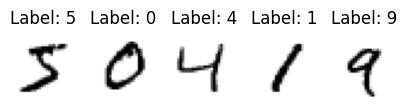

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)) / 255.0

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='binary')
    ax.set_title('Label: {}'.format(y_train[i]))
    ax.axis('off')
plt.show()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)



In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


**Print some part of the dataset**

**CNN model structure build**

In [ ]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**Print the model summary**

In [ ]:
#print the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

**Train the model with dataset**

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)



Epoch 1/10
422/422 [==============================] - 13s 6ms/step - loss: 0.3540 - accuracy: 0.8929 - val_loss: 0.0849 - val_accuracy: 0.9747
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0518 - val_accuracy: 0.9843
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0569 - val_accuracy: 0.9822
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0472 - accuracy: 0.9857 - val_loss: 0.0435 - val_accuracy: 0.9865
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0375 - val_accuracy: 0.9907
Epoch 7/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch

**Model evaluation with test data**

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0311 - accuracy: 0.9896
Test loss: 0.031069302931427956
Test accuracy: 0.9896000027656555


In [ ]:
predict = model.predict(x_test)
print(predict[0])

313/313 [==============================] - 1s 2ms/step
[2.1598498e-10 1.5227569e-07 2.9752096e-07 1.0247258e-07 1.2478179e-12
 2.2976983e-09 6.6656771e-16 9.9999940e-01 8.9195695e-10 1.3273180e-08]


In [ ]:
y_precit_class = np.argmax(predict[0])
y_precit_class